# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

# Loading Data

In [2]:
data = pd.read_csv("Resources\data_for_lr.csv")
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [38]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [37]:
data = data.dropna()

# Splitting Data

In [40]:
train_input = np.array(data.x[0:400]).reshape(400,1)
train_output = np.array(data.y[0:400]).reshape(400,1)
test_input = np.array(data.x[400:700]).reshape(299,1)
test_output = np.array(data.y[400:700]).reshape(299,1)

# <font color = "green">Linear Regression</font>

### Forward Propogation

f(x) = m*x + c where m and c are the parameters

In [41]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

# Cost Function

summation(1/2n* (y-f(x))^2)

In [42]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

# Gradient Descent for Backpropogation

df = sum(f(x)- y)/n


dm = df*x


dc = df*1

In [43]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

# Update Parameters

m = m-(learning_rate*dm)

c = c-(learning_rate*dc)

In [44]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

# Model Training

In [45]:
def train(train_input, train_output, learning_rate, iters):
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    for i in range(iters):
        
        predictions = forward_propagation(train_input, parameters)
        cost = cost_function(predictions, train_output)
        
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')
        legend = ax.legend()
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')                
        plt.show()
        derivatives = backward_propagation(train_input, train_output, predictions)
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters

# Training 

Iteration = 1, Loss = 2561.065689771257


<Figure size 640x480 with 0 Axes>

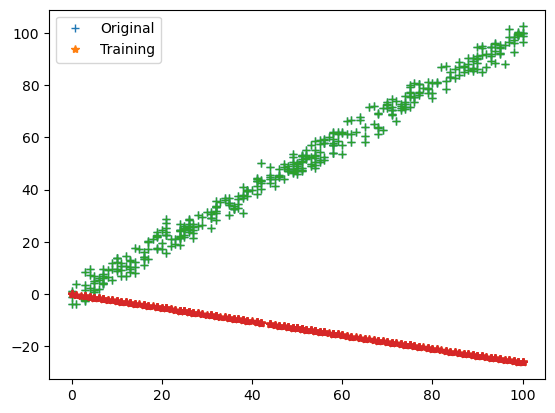

Iteration = 2, Loss = 1411.3479336567812


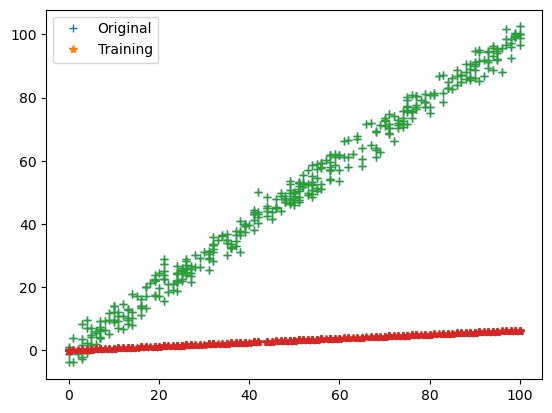

Iteration = 3, Loss = 778.5519458920786


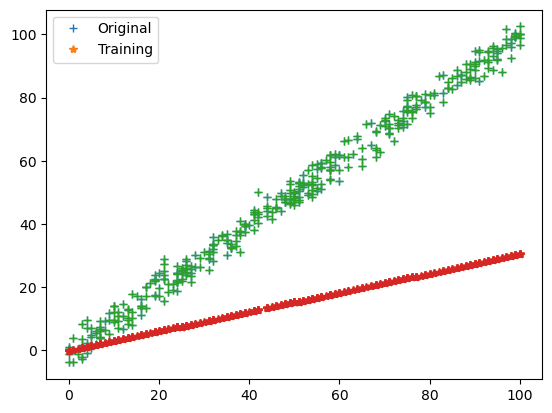

Iteration = 4, Loss = 430.26580329510136


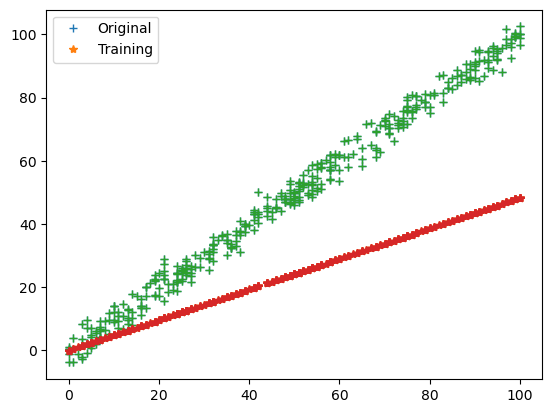

Iteration = 5, Loss = 238.57173507676663


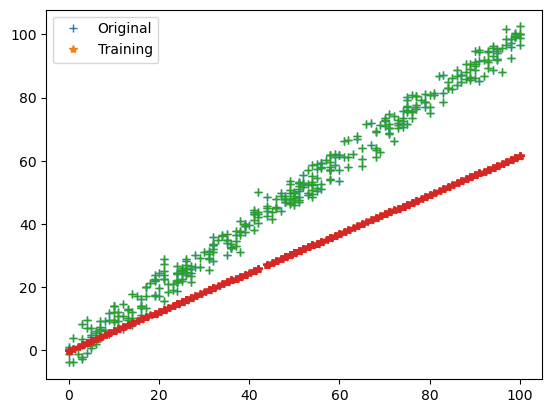

Iteration = 6, Loss = 133.06476433392635


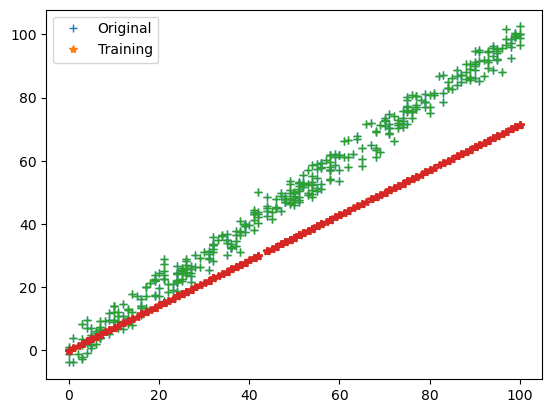

Iteration = 7, Loss = 74.99452243401595


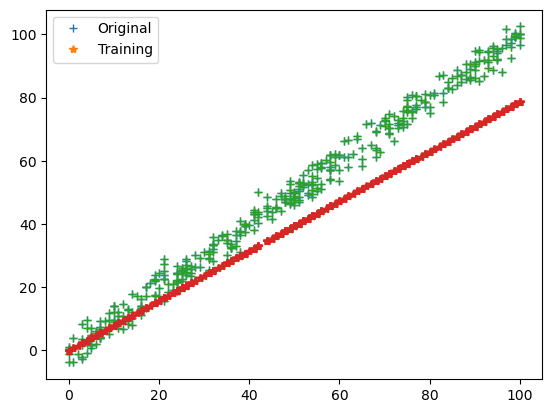

Iteration = 8, Loss = 43.03309855014518


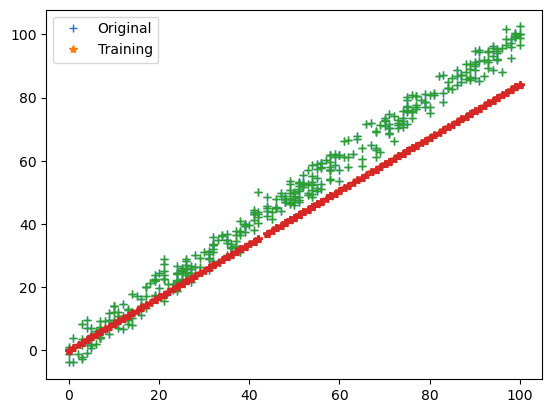

Iteration = 9, Loss = 25.441771315479674


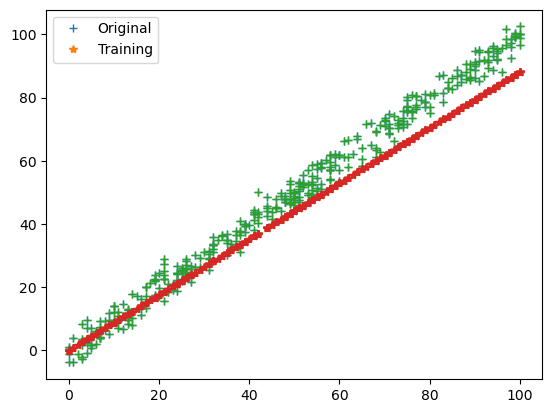

Iteration = 10, Loss = 15.7596369665604


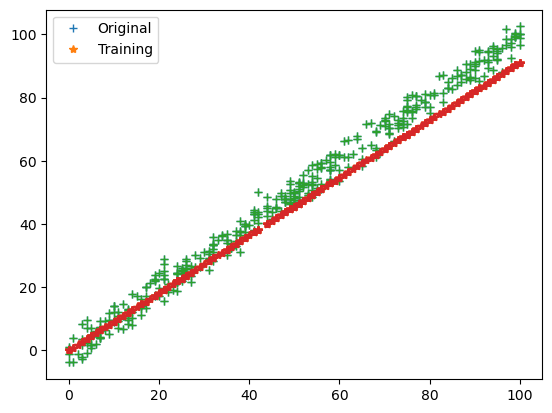

Iteration = 11, Loss = 10.430662768969073


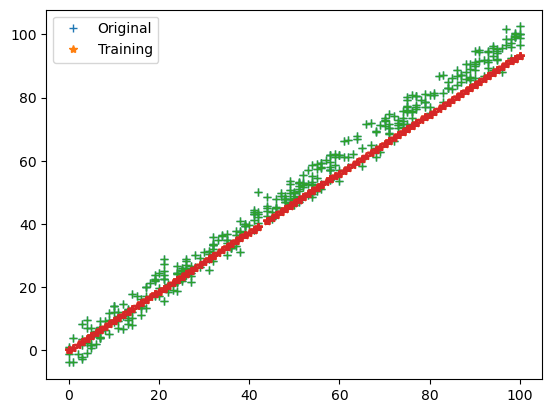

Iteration = 12, Loss = 7.49763510813794


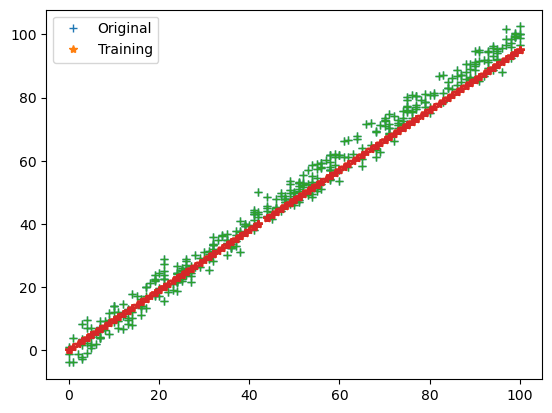

Iteration = 13, Loss = 5.883318362478654


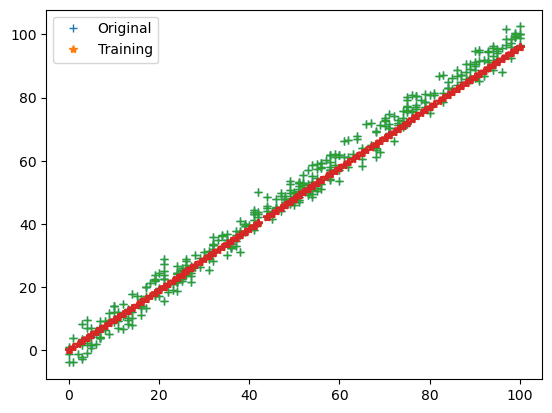

Iteration = 14, Loss = 4.9948101651868795


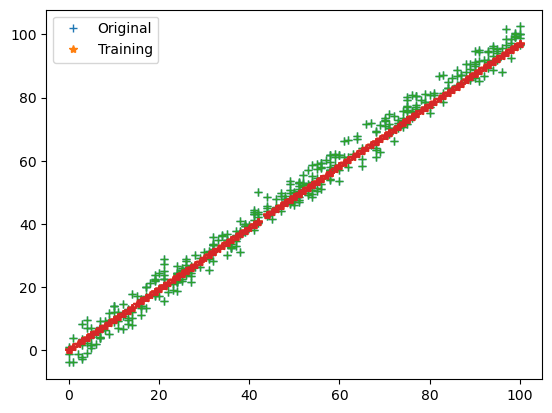

Iteration = 15, Loss = 4.505781522384949


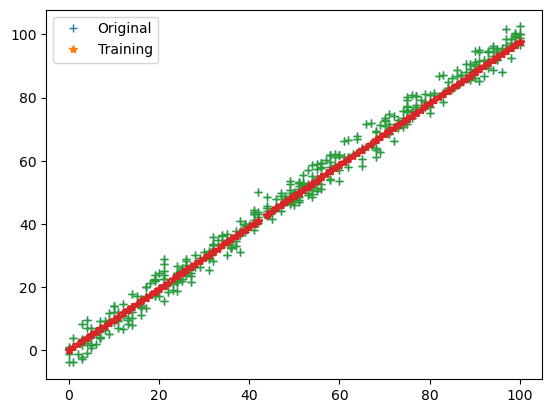

Iteration = 16, Loss = 4.236623415442691


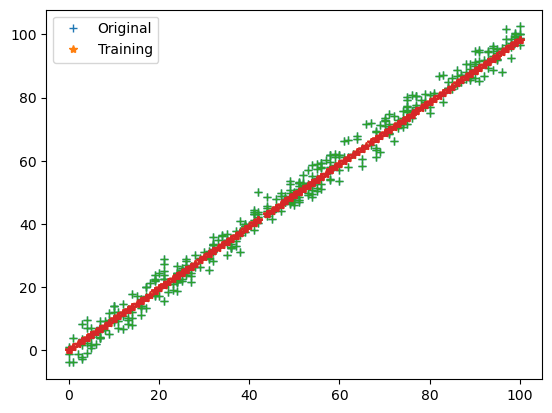

Iteration = 17, Loss = 4.0884803942514205


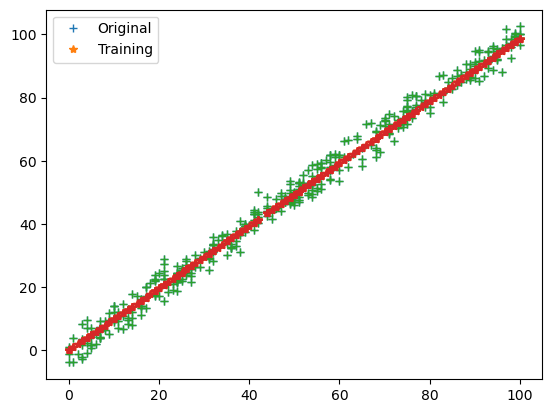

Iteration = 18, Loss = 4.006943164162557


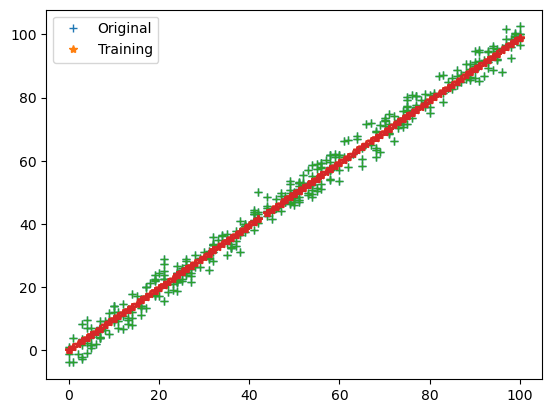

Iteration = 19, Loss = 3.9620652594941315


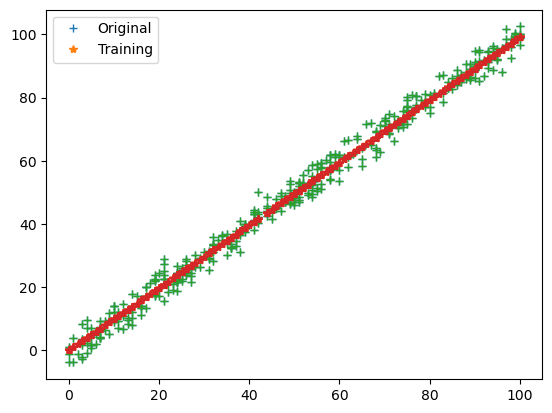

Iteration = 20, Loss = 3.937364371246664


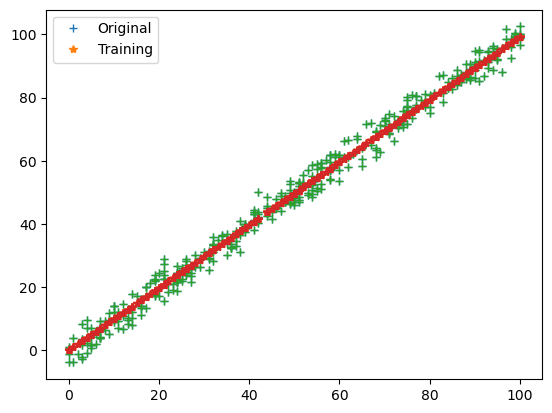

In [50]:
parameters= train(train_input, train_output, 0.00008, 20)

# Testing the Model

In [54]:
test_predictions = test_input * parameters["m"] + parameters["c"]

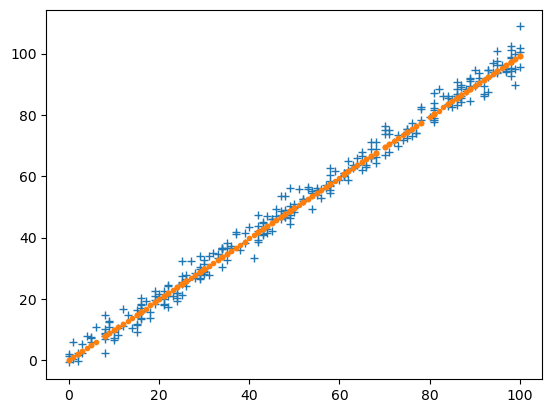

In [55]:
plt.plot(test_input, test_output,"+")
plt.plot(test_input, test_predictions,".")


plt.show()

# Cost for test data

In [57]:
cost_function(test_predictions, test_output)

4.087874460840195

# Predicted Parameters

In [58]:
parameters

{'m': 0.993786599131955, 'c': -0.04770147896760009}